In [1]:
from fastai.vision.all import *
from pathlib import Path
import h5py
from matplotlib import cm

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_train.hdf5'
classes = ["general", "W-boson"]
    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']

def label_func(x):
    signal = signal_data[int(x)]
    return classes[int(signal)]

def get_items(x):
    l = len(image_data)
    return [str(i) for i in range(l)]

def get_x(x):
    return torch.from_numpy(image_data[int(x)])

In [3]:
train_dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_items,
                   get_x = get_x,
                   get_y     = label_func,
                   splitter  = RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms=[Resize(200, method='squish')])

In [4]:
dls_train = train_dblock.dataloaders(path)

In [5]:
learn = vision_learner(dls_train,arch='convnext_tiny',  metrics=accuracy)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


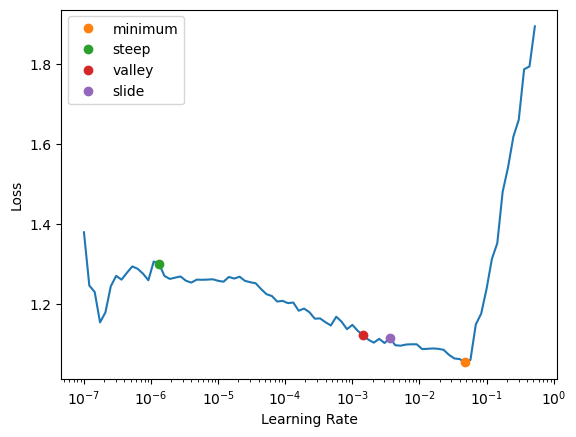

In [6]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [7]:
learn.fine_tune(
    20, 
    lrs.valley, 
    cbs=EarlyStoppingCallback(monitor='accuracy',min_delta=0.01, patience=4)
)

epoch,train_loss,valid_loss,accuracy,time
0,0.429021,0.410672,0.816734,37:48


epoch,train_loss,valid_loss,accuracy,time
0,0.397031,0.390257,0.827182,2:02:01
1,0.385442,0.397020,0.822535,2:01:58
2,0.382048,0.390109,0.826784,2:01:59
3,0.381820,0.402441,0.822551,2:01:57
4,0.391494,0.381235,0.831185,2:02:02


No improvement since epoch 0: early stopping
